# Individual based D

### MSD is first calculated for each OH to compute individual D, then the average is taken

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.linalg import eig

In [2]:
nrep = 1  # number of replications
#path_main = "C:/Users/Sachith/Desktop/work_oh/bulk_water/"
#path_main = "C:/Users/Sachith/Desktop/work_oh/long/12_13/water20" 
path_main='C:/shehani/postdoc_work/ML_Diffusion/sachith_work/data/'

path = [None] * (nrep)
nn = 0
while (nn<nrep):
    path[nn] = path_main +'md'+str(nn+1)
    nn = nn+1


#path.remove("C:/Users/Sachith/Desktop/work_oh/different_water_density/water20/md1")
#path.remove("C:/Users/Sachith/Desktop/work_oh/different_water_density/water25/md2")
#path.remove("C:/Users/Sachith/Desktop/work_oh/different_water_density/water25/md3")
#path.remove("C:/Users/Sachith/Desktop/work_oh/different_water_density/water25/md23")
#path.remove("C:/Users/Sachith/Desktop/work_oh/different_water_density/water25/md25")
#path.remove("C:/Users/Sachith/Desktop/work_oh/Differnt_separations/15_13/water_20/md19")
#path.remove("C:/Users/Sachith/Desktop/work_oh/different_substituents/(CO)NH2/md23")
#path[0] = "C:/Users/Sachith/Desktop/work_oh/long/12_13/water20"

In [3]:
nrep =len(path)
nrep

1

In [4]:
f=open(path[0] +'/input_data.dat','r')
lines=f.readlines()
for line in lines[0:]:
    data=line.split()
    if data[0]=='nsteps:':
        nsteps = int(data[1])
    if data[0]=='natoms:':
        natoms = int(data[1])
    if data[0]=='nonmvat:':
        nonmvat = int(data[1])
    if data[0]=='nmovingatoms:':
        nmovingatoms = int(data[1])
    if data[0]=='MDRestartFrequency:':
        MDRestartFrequency = int(data[1])
    if data[0]=='dt:':
        dt = float(data[1])
    if data[0]=='noh:':
        noh = int(data[1])
    if data[0]=='nwater:':
        nwater = int(data[1])
    if data[0]=='nox:':
        nox = int(data[1])
    if data[0]=='nhy:':
        nhy = int(data[1])
    if data[0]=='xbox:':
        xbox = float(data[1])
    if data[0]=='ybox:':
        ybox = float(data[1])
    if data[0]=='zbox:':
        zbox = float(data[1])

nsteps = int((nsteps/MDRestartFrequency)+1)-1 #+ int((nsteps2/MDRestartFrequency)+1)-2 #+int((nsteps3/MDRestartFrequency)+1)
nsteps = 743
nstep = nsteps
        
print('nsteps:','  ',nsteps )
print('natoms:','  ',natoms)
print('nonmvat:','  ',nonmvat)
print('nmovingatoms:','  ',nmovingatoms)
print('MDRestartFrequency:','  ',MDRestartFrequency)
print('dt:','  ',dt)
print('noh:','  ',noh)
print('nwater:','  ',nwater)
print('nox:','  ',nox)
print('nhy:','  ',nhy)
print('xbox:','  ',xbox)
print('ybox:','  ',ybox)
print('zbox:','  ',zbox)

nsteps:    743
natoms:    323
nonmvat:    261
nmovingatoms:    62
MDRestartFrequency:    10
dt:    1.0
noh:    1
nwater:    20
nox:    21
nhy:    41
xbox:    12.664
ybox:    13.3552
zbox:    40.0


In [5]:
x_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)
y_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)
z_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)
print(nstep)

743


In [6]:
kk = 0
while (kk<nrep):
    ii = 0
    f=open(path[kk] +'/oh1.dat','r')
    lines=f.readlines()
    for line in lines[:nsteps]:
        data=line.split()
        x_oh[kk,ii]=float(data[2])
        y_oh[kk,ii]=float(data[3])
        z_oh[kk,ii]=float(data[4])
        ii = ii+1
    f.close()
    kk = kk+1

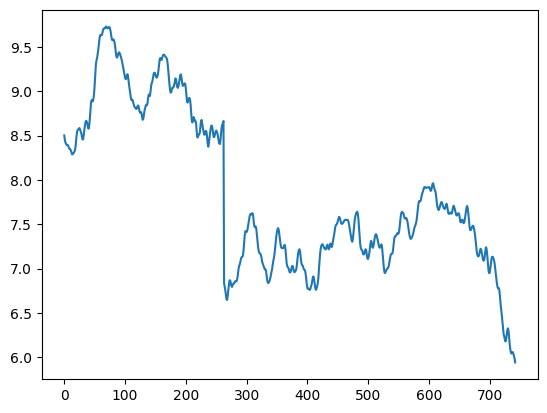

In [7]:
plt.figure()
rr = np.sqrt(((x_oh[0,:])**2+(y_oh[0,:])**2))
plt.plot(rr)

In [8]:
kk = 0
while (kk<nrep):
    
    ll = 0
    x_old = x_oh[kk,0]
    y_old = y_oh[kk,0]
    while ll<(nsteps):
        ijk = 1
        while ijk < 2:
            ijk = ijk+1
            if abs(x_oh[kk,ll]-x_old)>5:
                if x_oh[kk,ll]>x_old:
                    x_oh[kk,ll] = x_oh[kk,ll]-xbox
                    ijk = 1
                elif x_oh[kk,ll]<x_old:
                    x_oh[kk,ll] = x_oh[kk,ll]+xbox
                    ijk = 1
            if abs(y_oh[kk,ll]-y_old)>5: # atom need to be moved in y
                if y_oh[kk,ll]>y_old:
                    y_oh[kk,ll] = y_oh[kk,ll]-ybox
                    ijk = 1
                elif y_oh[kk,ll]<y_old:
                    y_oh[kk,ll] = y_oh[kk,ll]+ybox
                    ijk = 1
        x_old = x_oh[kk,ll]
        y_old = y_oh[kk,ll]
        ll = ll+1
    
    
    kk = kk+1

In [9]:
ndt = 100
mmsdx = np.empty(ndt)
mmsdy = np.empty(ndt)
mmsdz = np.empty(ndt)
mmsdxy = np.empty(ndt)
mmsdxz = np.empty(ndt)
mmsdyz = np.empty(ndt)
dtime = np.empty(ndt)
dtime=  np.arange(0.01, (0.01*ndt+0.01), 0.01)

Dfxx = np.empty(nrep)  
Dfyy = np.empty(nrep)
Dfzz = np.empty(nrep)
Dfxy = np.empty(nrep)
Dfxz = np.empty(nrep)
Dfyz = np.empty(nrep)
Dfx2d = np.empty(nrep)
Dfy2d = np.empty(nrep)
Df2d = np.empty(nrep)

ll = 0
while ll<nrep:
    kk = 0
    while kk<ndt:
        mmsdx[kk] = 0.0
        mmsdy[kk] = 0.0
        mmsdz[kk] = 0.0
        mmsdxy[kk] = 0.0
        mmsdxz[kk] = 0.0
        mmsdyz[kk] = 0.0
        jj = 0
        while jj< ((nsteps/(kk+1))-1):
            mmsdx[kk] = (x_oh[ll,(jj*(kk+1)+kk+1)]-x_oh[ll,jj*(kk+1)])**2+mmsdx[kk]
            mmsdy[kk] = (y_oh[ll,(jj*(kk+1)+kk+1)]-y_oh[ll,jj*(kk+1)])**2+mmsdy[kk]
            mmsdz[kk] = (z_oh[ll,(jj*(kk+1)+kk+1)]-z_oh[ll,jj*(kk+1)])**2+mmsdz[kk]
            mmsdxy[kk] = ((x_oh[ll,(jj*(kk+1)+kk+1)]-x_oh[ll,jj*(kk+1)])*(y_oh[ll,(jj*(kk+1)+kk+1)]-y_oh[ll,jj*(kk+1)]))+mmsdxy[kk]
            mmsdxz[kk] = ((x_oh[ll,(jj*(kk+1)+kk+1)]-x_oh[ll,jj*(kk+1)])*(z_oh[ll,(jj*(kk+1)+kk+1)]-z_oh[ll,jj*(kk+1)]))+mmsdxz[kk]
            mmsdyz[kk] = ((y_oh[ll,(jj*(kk+1)+kk+1)]-y_oh[ll,jj*(kk+1)])*(z_oh[ll,(jj*(kk+1)+kk+1)]-z_oh[ll,jj*(kk+1)]))+mmsdyz[kk]
            jj = jj+1
    
        mmsdx[kk] = mmsdx[kk]/((math.ceil(nsteps/(kk+1))-1))
        mmsdy[kk] = mmsdy[kk]/((math.ceil(nsteps/(kk+1))-1))
        mmsdz[kk] = mmsdz[kk]/((math.ceil(nsteps/(kk+1))-1))
        mmsdxy[kk] = mmsdxy[kk]/((math.ceil(nsteps/(kk+1))-1))
        mmsdxz[kk] = mmsdxz[kk]/((math.ceil(nsteps/(kk+1))-1))
        mmsdyz[kk] = mmsdyz[kk]/((math.ceil(nsteps/(kk+1))-1))
        kk = kk+1
    
    
    fitx=np.polyfit(dtime[:],mmsdx[:],1)
    fity=np.polyfit(dtime[:],mmsdy[:],1)
    fitz=np.polyfit(dtime[:],mmsdz[:],1)
    fitxy=np.polyfit(dtime[:],mmsdxy[:],1)
    fitxz=np.polyfit(dtime[:],mmsdxz[:],1)
    fityz=np.polyfit(dtime[:],mmsdyz[:],1)

    dxx = fitx[0]/2
    dyy = fity[0]/2
    dzz = fitz[0]/2
    dxy = fitxy[0]/2
    dxz = fitxz[0]/2
    dyz = fityz[0]/2


    dd2d = np.array([[dxx, dxy], 
                 [dxy, dyy]])
    w2,v2=eig(dd2d)


    Dfxx[ll] = dxx
    Dfyy[ll] = dyy
    Dfzz[ll] = dzz
    Dfxy[ll] = dxy
    Dfxz[ll] = dxz
    Dfyz[ll] = dyz
    Dfx2d[ll] = w2[0]
    Dfy2d[ll] = w2[1]
    Df2d[ll] = ((w2[0]+w2[1])/2)
    
    ll = ll+1



In [10]:
print('Dxx  =','{0: >#014.10f}'.format(np.mean(Dfxx)),'{0: >#014.10f}'.format(np.std(Dfxx)/np.sqrt(nrep)))
print('Dyy  =','{0: >#014.10f}'.format(np.mean(Dfyy)),'{0: >#014.10f}'.format(np.std(Dfyy)/np.sqrt(nrep)))
print('Dxy  =','{0: >#014.10f}'.format(np.mean(Dfxy)),'{0: >#014.10f}'.format(np.std(Dfxy)/np.sqrt(nrep)))
print('-----------------------')
print('Dx2  =','{0: >#014.10f}'.format(np.mean(Dfx2d)),'{0: >#014.10f}'.format(np.std(Dfx2d)/np.sqrt(nrep)))
print('Dy2  =','{0: >#014.10f}'.format(np.mean(Dfy2d)),'{0: >#014.10f}'.format(np.std(Dfy2d)/np.sqrt(nrep)))
print('D2d  =','{0: >#014.10f}'.format(np.mean(Df2d)),'{0: >#014.10f}'.format(np.std(Df2d)/np.sqrt(nrep)))#resultant diffusion coefficient in X, Y

Dxx  =   0.7479066378   0.0000000000
Dyy  =   0.0249412098   0.0000000000
Dxy  =   0.0948163514   0.0000000000
-----------------------
Dx2  =   0.7601348990   0.0000000000
Dy2  =   0.0127129485   0.0000000000
D2d  =   0.3864239238   0.0000000000


In [11]:
print('{0: >#014.10f}'.format(np.mean(Dfxx)),'{0: >#014.10f}'.format(np.std(Dfxx)/np.sqrt(nrep)),'{0: >#014.10f}'.format(np.mean(Dfyy)),'{0: >#014.10f}'.format(np.std(Dfyy)/np.sqrt(nrep)),'{0: >#014.10f}'.format(np.mean(Dfxy)),'{0: >#014.10f}'.format(np.std(Dfxy)/np.sqrt(nrep)),'{0: >#014.10f}'.format(np.mean(Dfx2d)),'{0: >#014.10f}'.format(np.std(Dfx2d)/np.sqrt(nrep)),'{0: >#014.10f}'.format(np.mean(Dfy2d)),'{0: >#014.10f}'.format(np.std(Dfy2d)/np.sqrt(nrep)),'{0: >#014.10f}'.format(np.mean(Df2d)),'{0: >#014.10f}'.format(np.std(Df2d)/np.sqrt(nrep)))

  0.7479066378   0.0000000000   0.0249412098   0.0000000000   0.0948163514   0.0000000000   0.7601348990   0.0000000000   0.0127129485   0.0000000000   0.3864239238   0.0000000000


In [12]:
dtime[1]-dtime[0]

0.01

In [13]:
import seaborn as sns

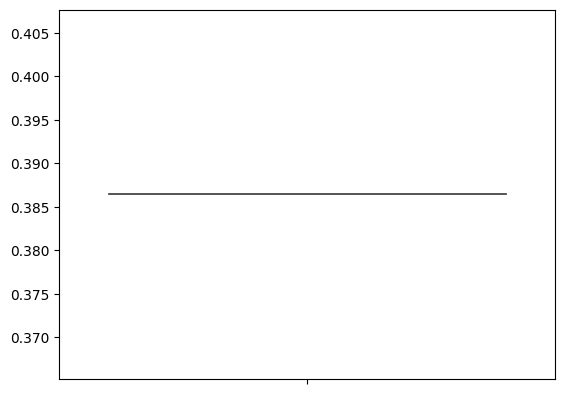

In [14]:
# violin plot
sns.violinplot(y=Df2d[:])

# display the plot
plt.show()

In [15]:
Df2d[:]

array([0.38642392])

<Axes: >

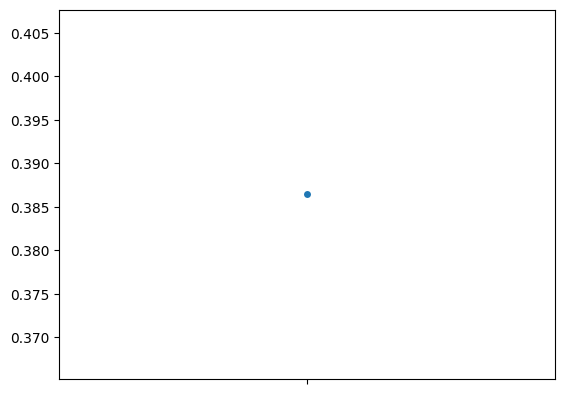

In [16]:
sns.stripplot(y=Df2d[:])
#sns.stripplot(y=Dfy2d[:])

Text(1.1, 0.3864239237647336, 'max')

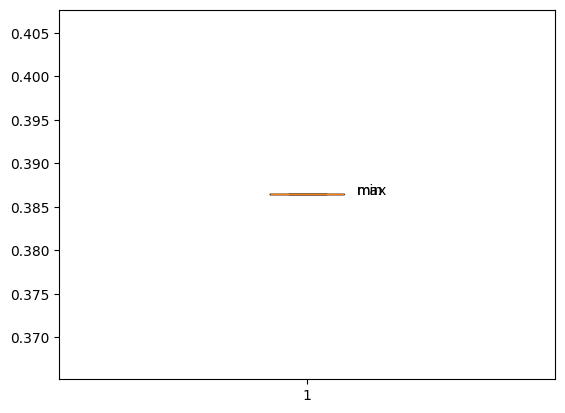

In [17]:
plt.boxplot(Df2d[:])
plt.text(x = 1.1, y = Df2d[:].min(), s ='min')
plt.text(x = 1.1, y = Df2d[:].max(), s ='max')

In [18]:
Df2d

array([0.38642392])

In [19]:
np.mean(Df2d[0:5])

0.3864239237647336

In [20]:
avD=np.empty(len(Df2d))
avDx = np.empty(len(Df2d))
avDy = np.empty(len(Df2d))
errD = np.empty(len(Df2d))
errDx = np.empty(len(Df2d))
errDy = np.empty(len(Df2d))
avD[0]=Df2d[0]
avDx[0]=Dfxx[0]
avDy[0]=Dfyy[0]
errD[0] = 1
errDx[0] = 1
errDy[0] = 1
kk=1
while kk<len(Df2d):
    avD[kk] = np.mean(Df2d[0:(kk+1)])
    avDx[kk] = np.mean(Dfxx[0:(kk+1)])
    avDy[kk] = np.mean(Dfyy[0:(kk+1)])
    errD[kk] = np.std(Df2d[0:(kk+1)])/np.sqrt(kk+1)
    errDx[kk] = np.std(Dfxx[0:(kk+1)])/np.sqrt(kk+1)
    errDy[kk] = np.std(Dfyy[0:(kk+1)])/np.sqrt(kk+1)
    #print(kk,Df2d[0:(kk+1)])
    kk=kk+1

In [21]:
len(avD)

1

In [22]:
avD

array([0.38642392])

In [23]:
errD

array([1.])

ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

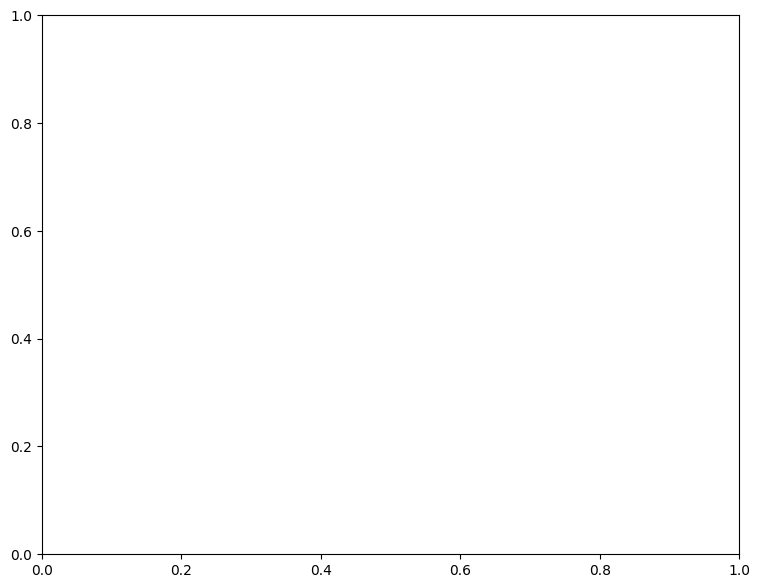

In [24]:
plt.figure(figsize=(9, 7))
#plt.plot(avD[:],color='black',linewidth=4,label="x")
#plt.plot(np.arange(1, 26, 1, dtype=int),avDx[:],color='black',linewidth=2,label="x",marker='o')
plt.plot(np.arange(1, 26, 1, dtype=int),avD[:],color='Blue',linewidth=2,marker='o')
#plt.plot(np.arange(1, 26, 1, dtype=int),avDy[:],color='r',linewidth=2,label="y",marker='>',linestyle='--')

plt.legend(loc="upper right")
plt.xlabel('N$_r$', fontsize=24)
plt.ylabel('D [Å${^2}$ps${^{-1}]}$',fontsize=24)
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
#plt.savefig(path[0] +'/avD_vs_rep.jpg', dpi=400)

In [ ]:
plt.figure(figsize=(9, 7))
plt.plot(np.arange(2, 26, 1, dtype=int),errD[1:],color='Red',linewidth=2,marker='o')
#plt.plot(np.arange(2, 26, 1, dtype=int),errDx[1:],color='black',linewidth=2,label="x",marker='o')
#plt.plot(np.arange(2, 26, 1, dtype=int),errDy[1:][:],color='r',linewidth=2,label="y",marker='>',linestyle='--')
#plt.legend(loc="upper right")
plt.xlabel('N$_r$', fontsize=24)
#plt.ylabel('Error [Å$\mathbf{^2}$ps$\mathbf{^{-1}]}$',fontsize=18,fontweight='bold')
plt.ylabel('Error [Å${^2}$ps${^{-1}]}$',fontsize=24)
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#plt.savefig(path[0] +'/errD_vs_rep.jpg', dpi=400)

In [ ]:
np.arange(2, 26, 1, dtype=int)

In [ ]:
errDy

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('N$_r$', fontsize=24, color='black')
ax1.set_ylabel('D [Å${^2}$ps${^{-1}]}$', color='black', fontsize=24)
line1, = ax1.plot(np.arange(1, 26, 1, dtype=int), avD[:], color=color, linewidth=2, marker='o', label='D')
ax1.tick_params(axis='both', which='major', direction='in', length=5, width=0.5)
ax1.grid(which='major', axis='both', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('error [Å${^2}$ps${^{-1}]}$', color='black', fontsize=24)
line2, = ax2.plot(np.arange(2, 26, 1, dtype=int), errD[1:], '-.D', color=color, linewidth=2, marker='D', label='Error')
ax2.tick_params(axis='both', which='major', direction='in', length=5, width=0.5)
ax2.grid(which='major', axis='both', linestyle='--', linewidth=0.5)

# added legends
plt.legend([line1, line2], ['D', 'Error'], loc='upper right', fontsize=14)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
fig.tight_layout()
#plt.savefig(path[0] +'/avD_vs_rep.jpg', dpi=400)
plt.show()